## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime

 ## Load Dataset

In [2]:
# Read the CSV file into a DataFrame
file_path = "/kaggle/input/productdemandforecasting/Historical Product Demand.csv"
df = pd.read_csv(file_path)
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


## Data Cleaning & Preprocessing

In [3]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Remove missing values in 'Date'
df = df.dropna(subset=['Date'])

# Convert 'Order_Demand' to numeric (remove parentheses indicating negative values)
df['Order_Demand'] = df['Order_Demand'].astype(str).str.replace("[()]", "", regex=True).astype(float)

# Display dataset after preprocessing
print("\nAfter Cleaning:")
df.info()
df.head()



After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1037336 non-null  object        
 1   Warehouse         1037336 non-null  object        
 2   Product_Category  1037336 non-null  object        
 3   Date              1037336 non-null  datetime64[ns]
 4   Order_Demand      1037336 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 47.5+ MB


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100.0
1,Product_0979,Whse_J,Category_028,2012-01-19,500.0
2,Product_0979,Whse_J,Category_028,2012-02-03,500.0
3,Product_0979,Whse_J,Category_028,2012-02-09,500.0
4,Product_0979,Whse_J,Category_028,2012-03-02,500.0


## Feature Engineering

In [4]:
# Extract useful time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Aggregate data at the monthly level
df_grouped = df.groupby(['Year', 'Month'])['Order_Demand'].sum().reset_index()
df_grouped['Date'] = pd.to_datetime(df_grouped[['Year', 'Month']].assign(Day=1))

# Sort data by Date
df_grouped = df_grouped.sort_values(by='Date')

# Display the transformed dataset
df_grouped.head()


,Year,Month,Order_Demand,Date
0,2011,1,2.0,2011-01-01
1,2011,5,108.0,2011-05-01
2,2011,6,92000.0,2011-06-01
3,2011,9,6728.0,2011-09-01
4,2011,10,7.0,2011-10-01


## Data Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


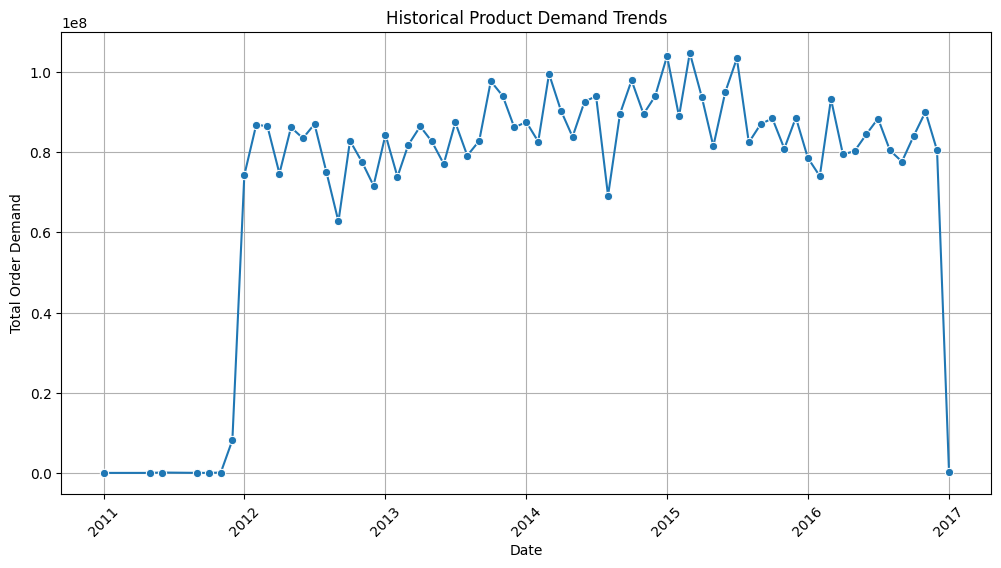

In [5]:
# Plot historical demand trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Order_Demand', data=df_grouped, marker='o')
plt.xlabel('Date')
plt.ylabel('Total Order Demand')
plt.title('Historical Product Demand Trends')
plt.xticks(rotation=45)
plt.grid()
plt.show()


##  Model Training (RandomForest Regressor)

In [6]:
# Define input features (X) and target variable (y)
X = df_grouped[['Year', 'Month']]
y = df_grouped['Order_Demand']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



Model Evaluation:
Mean Absolute Error (MAE): 6044362.45
Root Mean Squared Error (RMSE): 7302279.89


In [7]:
# Predict future demand for the next 6 months
future_dates = pd.DataFrame({'Year': [2024]*6, 'Month': [1, 2, 3, 4, 5, 6]})
future_predictions = model.predict(future_dates)

# Create a DataFrame to store results
future_df = future_dates.copy()
future_df['Predicted_Order_Demand'] = future_predictions
print("\nFuture Demand Forecast:\n", future_df)

# Save processed data
df_grouped.to_csv("processed_product_demand.csv", index=False)



Future Demand Forecast:
    Year  Month  Predicted_Order_Demand
0  2024      1             21133733.41
1  2024      2             20318726.32
2  2024      3             23267448.69
3  2024      4             23357881.56
4  2024      5             21546515.72
5  2024      6             22062112.45
